# 6.6 Sourcing & Analyzing Time-Series Data

### This script contains following steps:

#### 1. Importing libraries and data
#### 2. Subsetting and preparing time-series data
#### 3. Creating a line chart of the dataframe
#### 4. Time series analysis: decomposition
#### 5. Testing for stationarity using Dickey_Fuller
#### 6. Stationarizing data and testing it
#### 7. Testing for stationary using autocorrelation

### 1. Importing libraries and data

In [1]:
import quandl
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import statsmodels.api as sm 
import os
import warnings
warnings.filterwarnings("ignore") 
plt.style.use('fivethirtyeight') 

In [2]:
# This option ensures the graphs you create are displayed in your notebook without the need to "call" them specifically.
%matplotlib inline

In [3]:
# Creating path
path =r'/Users/parvinrahimi/Desktop/Data/Data Immersion/Achievement 6/Violence'

In [4]:
# Importing dataframes
df = pd.read_pickle(os.path.join(path, '02 Data','Clean Data','EU_Data.pkl'))

### 2. Subsetting and preparing time-series data

In [5]:
# Creating subsets for data on intentional homicide ( THE DATA ANSWERS VARIOUS QUESTIONS, I LOOK AT THE HOMICIDE RATE IN EU SINCE 2000)
df_1= df.loc[df['Indicator Code'] == 'VC.IHR.PSRC.FE.P5']

In [6]:
df_1.head(5)

,Indicator Name,Indicator Code,Country Name,Country Code,Year,Value,EU Region
10748,"Intentional homicides, female (per 100,000 fem...",VC.IHR.PSRC.FE.P5,Albania,ALB,2021,0,Southern Europe
10749,"Intentional homicides, female (per 100,000 fem...",VC.IHR.PSRC.FE.P5,Albania,ALB,2020,0,Southern Europe
10750,"Intentional homicides, female (per 100,000 fem...",VC.IHR.PSRC.FE.P5,Albania,ALB,2019,0,Southern Europe
10751,"Intentional homicides, female (per 100,000 fem...",VC.IHR.PSRC.FE.P5,Albania,ALB,2018,1,Southern Europe
10752,"Intentional homicides, female (per 100,000 fem...",VC.IHR.PSRC.FE.P5,Albania,ALB,2017,0,Southern Europe


In [7]:
df_1.shape

(753, 7)

In [8]:
# dropping unnecessary columns in df_1
df_1 = df_1.drop(columns=['Indicator Name', 'Indicator Code', 'Country Name', 'Country Code', 'EU Region'])

In [9]:
df_1.head()

,Year,Value
10748,2021,0
10749,2020,0
10750,2019,0
10751,2018,1
10752,2017,0


In [10]:
# creating new dataframe using groupby to sum the homicide rate per year
df_sum = df_1.groupby(['Year'], as_index = False)['Value'].sum()
print(df_sum)
print(type(df_sum))

    Year  Value
0   2000     45
1   2001     46
2   2002     54
3   2003     47
4   2004     43
5   2005     36
6   2006     33
7   2007     29
8   2008     23
9   2009     26
10  2010     27
11  2011     21
12  2012     23
13  2013     19
14  2014     17
15  2015     19
16  2016     17
17  2017     16
18  2018     15
19  2019     12
20  2020     13
21  2021      7
<class 'pandas.core.frame.DataFrame'>


In [11]:
df_sum.columns

Index(['Year', 'Value'], dtype='object')

In [12]:
# Rename the column Value in df_1
df_sum.rename(columns = {'Value' : 'Sum'}, inplace = True)

In [13]:
# Rename the column Year in df_1
df_sum.rename(columns = {'Year' : 'Date'}, inplace = True)

In [14]:
df_sum

,Date,Sum
0,2000,45
1,2001,46
2,2002,54
3,2003,47
4,2004,43
5,2005,36
6,2006,33
7,2007,29
8,2008,23
9,2009,26


In [15]:
# Setting the "Date" column as the index
from datetime import datetime
df_sum['Datetime'] = pd.to_datetime(df_sum['Date'])
df_sum = df_sum.set_index('Datetime')
df_sum.drop(['Date'], axis=1, inplace=True) 
df_sum.head()

,Sum
Datetime,
2000-01-01,45
2001-01-01,46
2002-01-01,54
2003-01-01,47
2004-01-01,43


### 3. Creating a line chart 

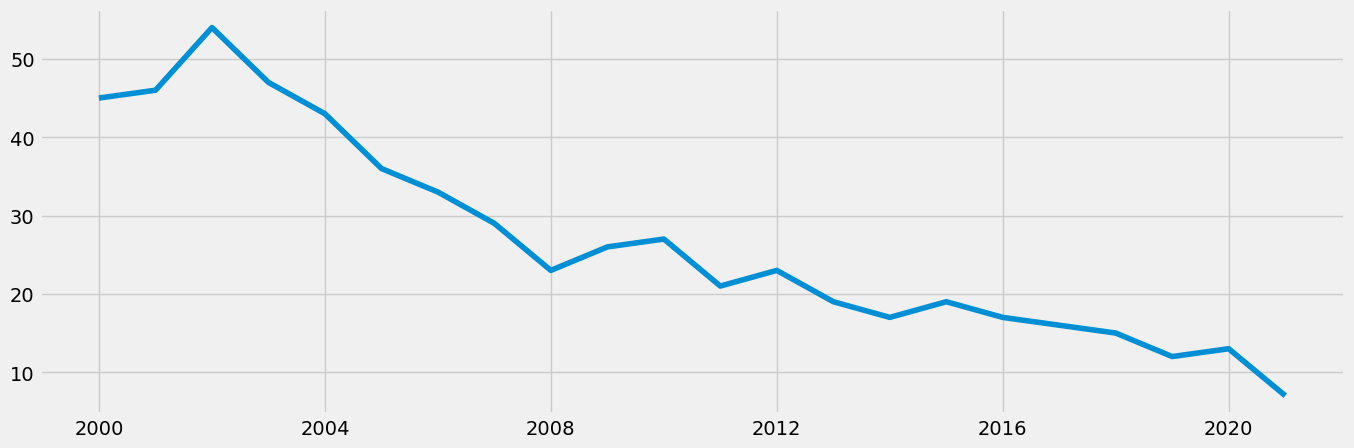

In [16]:
# Plotting the data using matplotlib
plt.figure(figsize=(15,5), dpi=100) 
plt.plot(df_sum)

#### The decreasing pattern of the line chart indicates a non-stationary data! Howerver I am going to test this.

### 4. Time-series analysis: decomposition

In [17]:
# Decomposing the time series using an additive model
decomposition = sm.tsa.seasonal_decompose(df_sum, model='additive')

In [18]:
# Defining a fixed size for all special charts
from pylab import rcParams 
rcParams['figure.figsize'] = 18, 7

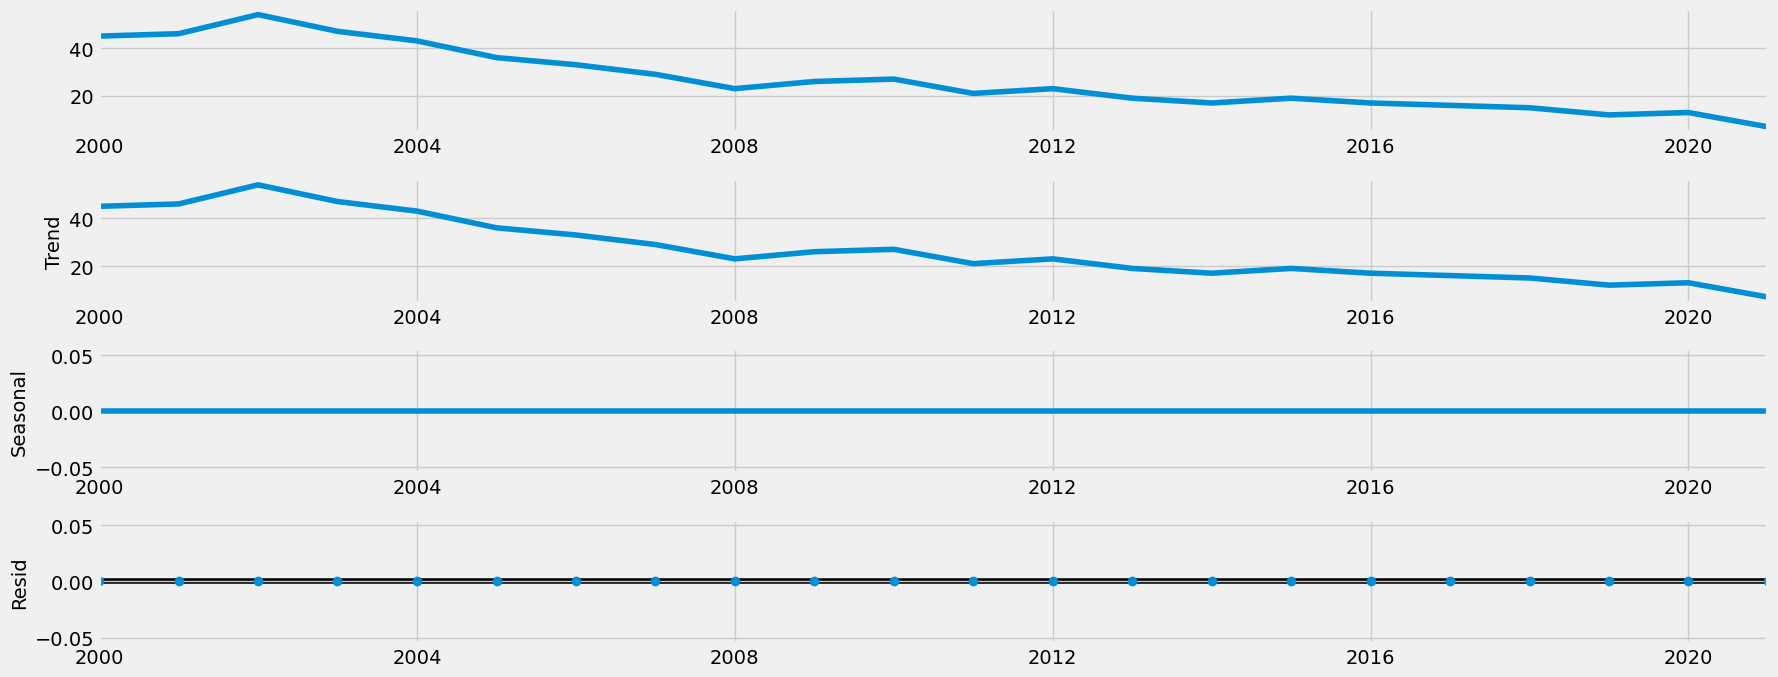

In [19]:
# Plotting the separate components
decomposition.plot()
plt.show()

#### the trend line suggests a non-stationary data.

#### the level and the trend line are very similar and show a decreasing behavior. This means the the homicide rate has a decreasing trend since 2000. There is no need for smoothing.

#### there is no seasonality in the data, which was predictable, since the data has been gathered yearly.

#### there doesnt seem to be any noise (residual) in the data, which was also predictable due to the fact the the trend and level line were identical.

### 5. Testing for stationarity using Diecky_Fuller

In [20]:
# Importing the adfuller() function (Dickey_fuller method)
from statsmodels.tsa.stattools import adfuller 

def dickey_fuller(timeseries): 
   
    print ('Dickey-Fuller Stationarity test:')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key,value in test[4].items():
       result['Critical Value (%s)'%key] = value
    print (result)

dickey_fuller(df_sum['Sum'])

Dickey-Fuller Stationarity test:
Test Statistic                  0.969026
p-value                         0.993928
Number of Lags Used             8.000000
Number of Observations Used    13.000000
Critical Value (1%)            -4.068854
Critical Value (5%)            -3.127149
Critical Value (10%)           -2.701730
dtype: float64


#### the Dickey-Fuller test checks for the existence of a unit root (any random jump that makes the data non-stationary).

#### the p-value (0,99) is much higher than 0.05 which means the test result is not significant. Thus, there is a unit root in the data, and the data is non-stationary.

#### also, according to the test the “Critical Value (5%)” is much smaller than the test statistic, which is 0,96.  This means also that the null hypothesis can’t be rejected . 

#### extract from the exercise explanation: null hypothesis: "The null hypothesis in this case would be the presence of a unit root (you want to disprove that there’s a unit root, which would mean that your data is stationary)".

#### since data is non-stationary I do a round of differencing to stationarise the data

### 6. Stationarizing the data using differencing

In [21]:
# stationarising data using differencing
df_diff = df_sum - df_sum.shift(1) 

df_diff.dropna(inplace = True) 

In [22]:
df_diff.head()

,Sum
Datetime,
2001-01-01,1.0
2002-01-01,8.0
2003-01-01,-7.0
2004-01-01,-4.0
2005-01-01,-7.0


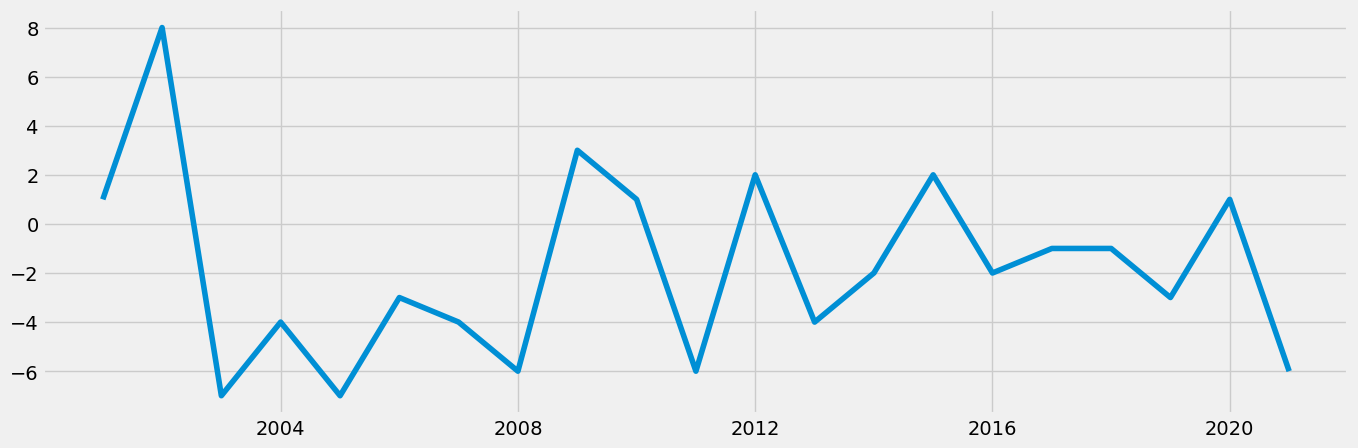

In [23]:
# Checking out what the differencing did to the time-series curve

plt.figure(figsize=(15,5), dpi=100)
plt.plot(df_diff)

#### the values on the y-axis and the constant decreasing trend of the data has changed greatly. The chart line is not horizontal but the downward slope is not there anymore. the data looks more homogeneous.

In [24]:
#testing the dickey_fuller test again:
dickey_fuller(df_diff)

Dickey-Fuller Stationarity test:
Test Statistic                 -1.957695
p-value                         0.305425
Number of Lags Used             7.000000
Number of Observations Used    13.000000
Critical Value (1%)            -4.068854
Critical Value (5%)            -3.127149
Critical Value (10%)           -2.701730
dtype: float64


#### the test results look better this time.

#### the p-value (0,30) is still much higher than 0.05 which means the test result is not significant yet. Thus, there is still a unit root in the data, and the data is non-stationary.

#### also, according to the test the “Critical Value (5%)” is still very much smaller than the test statistic, which is -1,95.  This means also that the null hypothesis can’t be rejected yet. 

In [25]:
# second round of stationarising data using differencing
df_diff_2 = df_diff - df_diff.shift(1) 

In [26]:
df_diff_2.dropna(inplace = True) 

In [27]:
df_diff_2.head()

,Sum
Datetime,
2002-01-01,7.0
2003-01-01,-15.0
2004-01-01,3.0
2005-01-01,-3.0
2006-01-01,4.0


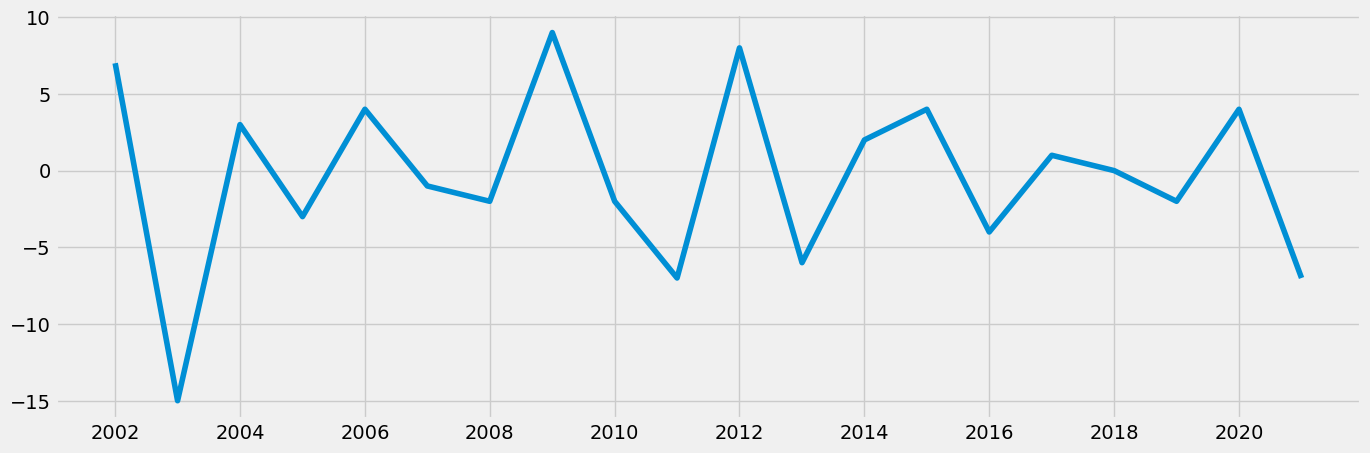

In [28]:
# Checking out what the differencing did to the time-series curve for the second time

plt.figure(figsize=(15,5), dpi=100)
plt.plot(df_diff_2)

In [29]:
#testing the dickey_fuller test again:
dickey_fuller(df_diff_2)

Dickey-Fuller Stationarity test:
Test Statistic                 -5.521486
p-value                         0.000002
Number of Lags Used             1.000000
Number of Observations Used    18.000000
Critical Value (1%)            -3.859073
Critical Value (5%)            -3.042046
Critical Value (10%)           -2.660906
dtype: float64


### 7. Testing for stationary using autocorrelation

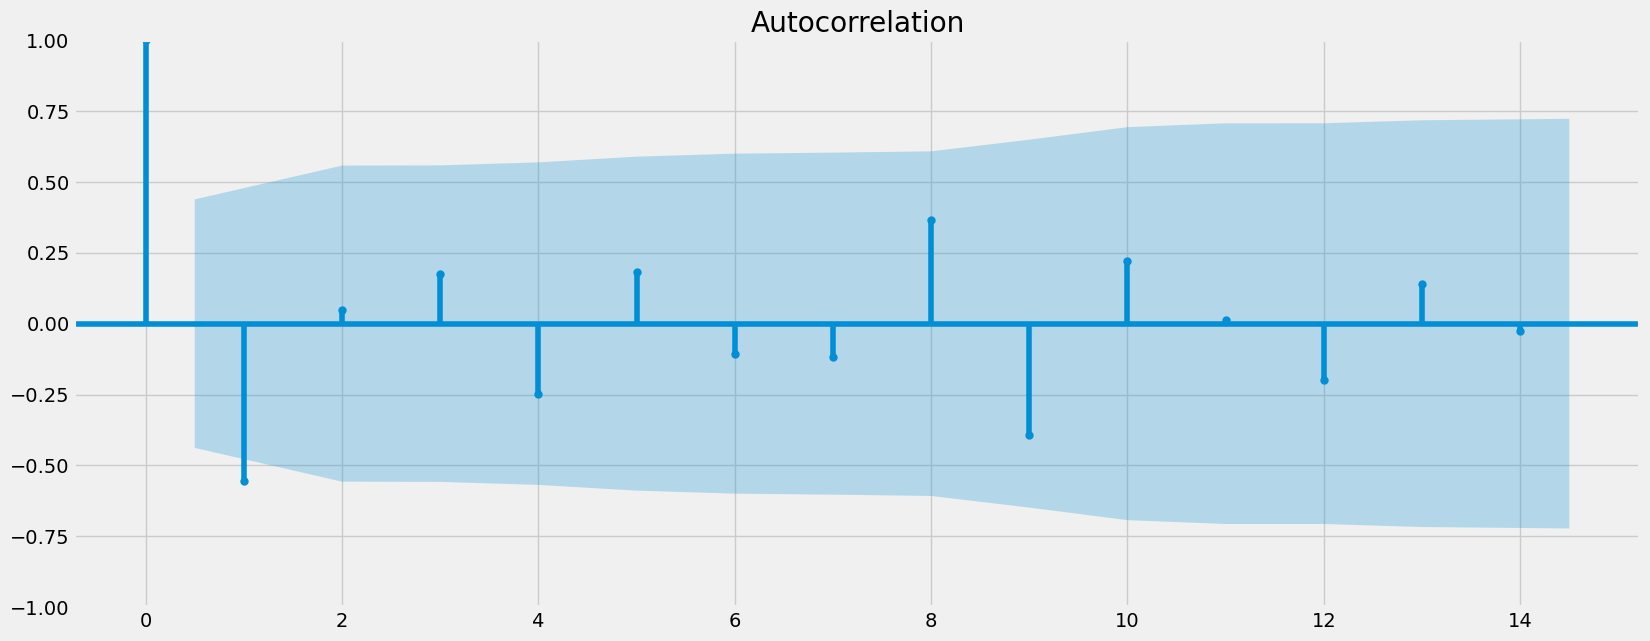

In [31]:
# Checking out a plot of autocorrelations
# importing the autocorrelation and partial correlation plots
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf 

plot_acf(df_diff_2)
plt.show()

#### Both tests (autocorrelation) and dickey-fuller test show better results after the second differencing. 

#### the p-value (0,000002) is much lower than 0.05 which means the test result is significant. Thus, there is no unit root in the data, and the data is now stationary.

#### also, according to the test the “Critical Value (5%)” is higher than the test statistic, which is -5,52.  This also means that the null hypothesis can be rejected this time. 

#### the blue confidence interval does not cover all vertical lines that represent the lags in the data. This means that the data has lags that are correlated with each other. Although the data does not have many lags beyond the blue confidence interval, the test still shows that the data is slightly non-stationary.

#### following the unspoken rule of thumb that there should be at least ten significant lags for another round of differencing, I decided not to do another round of differencing, because of the lower Test Statistic value in the Dickey-Fuller test.